# Section 1: Business Understanding

I am interested in Netflix's Production behaviour. As a Neflix user myself, I have a feeling that TV Shows become more prevalent than Movies, and that there might be a shift toward some specific genres.
To investigate this, I try to answer 3 business questions:

### Question 1: Is there a trend towards TV-Shows over time?

### Question 2: Are there differences in countries regarding the decision wheter to produce TV Shows or Movies?

### Question 3: Is there a trend towards genres?


# Section 2: Data Understanding

In [269]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [270]:
def read_csv_file(path_to_csv: str, encoding='unicode_escape', delimiter=None) -> pd.DataFrame:
    """
    Function to read in a csv-file from file path and return to pandas DataFrame.
    Arguments:
         path_to_csv: The file-path to the CSV-file.
         encoding: Keyword-argument for pandas read_csv-function.
         delimiter: Keyword-argument for pandas read_csv-function.
    Returns:
        pandas DataFrame
    """
    df = pd.read_csv(path_to_csv, encoding=encoding, delimiter=delimiter)
    return df

In [271]:
df = read_csv_file('data/netflix_titles.csv', encoding='unicode_escape')

In [272]:
df.shape

(8809, 26)

#### The dataframe consists of 26 columns and 8809 records.

In [273]:
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Many columns are unnamed and appear to hold only NaN's - investigate further

In [274]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

#### Indeed, many columns hold only null values -> Drop later in the Process
#### Director, Cast, and Country is also often missing

In [275]:
# Check Types of Columns
df.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
Unnamed: 12     float64
Unnamed: 13     float64
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

#### We have mostly categorical columns with one integer (release year) (not included the null columns)

In [276]:
# Investigate the 'Type' Columns, specifically how many distinct values it holds
df.type.value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

#### There are only two types in the dataframe, TV Shows and Movies. Movies appear more than twice as much.

# Section 3: Data Preparation

In [277]:
# drop columns that are only null (see section 2)
df = df.dropna(how='all', axis=1)

In [278]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### After dropping the unnamed Columns, we are left with 12 Columns that could add some value to our analysis.

#### The Column 'date_added' is a date in string-format. I create a new column out of it that holds only the year as information (the last 4 elements of the string). This is needed because I want to do some analysis based on the year the movie/show was added to Netflix.

In [279]:
# add column 'year_date_added' from col 'date_added'
df['year_date_added'] = df['date_added'].str[-4:].astype('float')
df['year_date_added'].isna().sum()

10

#### 10 Entries do not hold information about the date they were added. As these are only a minority of records, I will drop them for the further analysis. Imputing the NaN's could also work, but because of the small number of NaN's, I believe dropping values is okay.

In [280]:
# drop these NaN's for further analysis with this col
df = df.dropna(subset='year_date_added')
df['year_date_added'].isna().sum()

0

#### For the third Question, I am interested in Genres. However, these are put together in the column 'listed_in' as one string, separated by commas. I will use one-hot encoding with a separator to put these into individual columns, holding values 0 and 1.

In [281]:
df_encoded = df['listed_in'].str.get_dummies(sep=', ')
df= pd.concat([df, df_encoded], axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,1,0,0,0,0,0,0,0,0,0


#### It appears that some genres appear more than once, with just some minor spelling differences. I will combine these by creating a new column for these genres. (All columns remain, but I will use only my new ones later in the analysis)

In [282]:
# Combine some obvious genres
df['Thriller'] = (df[['Thriller', 'Thrillers', 'TV Thrillers']] == 1).any(axis=1).astype(int)
df['Sci-Fi & Fantasy'] = (df[['Sci-Fi & Fantasy', 'Sci-fi']] == 1).any(axis=1).astype(int)
df['Drama'] = (df[['Drama', 'Dramas', 'TV Dramas']] == 1).any(axis=1).astype(int)
df['Anime'] = (df[['Anime Series', 'Anime Features']] == 1).any(axis=1).astype(int)
df['Action & Adventure'] = (df[['Action & Adventure', 'Action']] == 1).any(axis=1).astype(int)
df['Horror'] = (df[['Horror', 'Horror Movies', 'TV Horror']] == 1).any(axis=1).astype(int)
df['Comedies'] = (df[['Comedies', 'TV Comedies']] == 1).any(axis=1).astype(int)

In [283]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thriller,Thrillers,Anime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,1,0,1,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,1,1,0,0,0,0,0,0,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0,0,0,0,0,0,0,0,0,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0,0,0,0,0,0,0,0,0,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,0,0,0,0,0,0,0,0,0,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,0


#### Now the genres are combined and are ready for analysis.

# Section 4: Evaluation
#### (No Data Modeling Step needed in this notebook)

### Question 1: Is there a trend towards TV-Shows over time?

In [284]:
# Count values for each year_date_added ot get a feeling for the distribution
df.year_date_added.value_counts()

year_date_added
2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2024.0       2
2010.0       1
Name: count, dtype: int64

#### It appears that for the year 2024 there are only 2 records, while for 2022 and 2023 there are none. I will therefore only consider records until 2021, starting in 2013 (about 10 years back is what I am most interested in).

In [285]:
# I will create a separate df 'counts', which is grouped by type and year_date_added. The following code counts the records for each group.
counts = df.groupby(['type', 'year_date_added']).size().reset_index(name='count')

In [286]:
counts = counts[(counts['year_date_added'] >= 2013) & (counts['year_date_added'] <= 2021)]

In [287]:
counts.head(20)

,type,year_date_added,count
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,839
10,Movie,2018.0,1237
11,Movie,2019.0,1424
12,Movie,2020.0,1284
13,Movie,2021.0,993
16,TV Show,2013.0,5


#### The counts-df is ready vor visualisation.

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

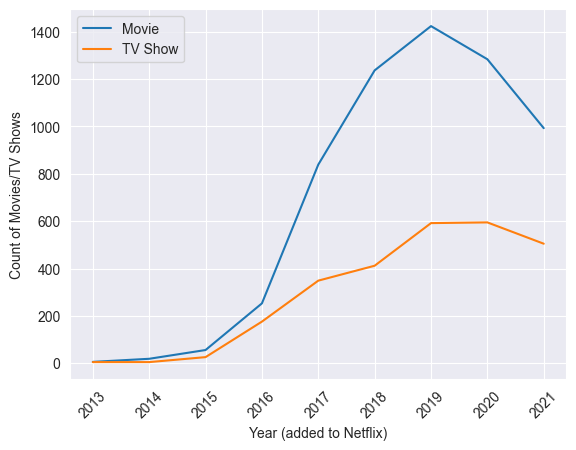

In [288]:
sns.lineplot(data=counts, x='year_date_added', y='count', hue='type')
plt.xlabel('Year (added to Netflix)')
plt.ylabel('Count of Movies/TV Shows')
plt.legend(title=None)
plt.xticks(rotation=45)

#### The graph shows that there were more Movies than TV Shows in general. Both lines seem to follow a similar trend. However, the TV Show line seems to have a steeper slope (higher growth). Therefore, in the next step, I will calculate the growth rates for each type over the years.

In [289]:
# separate the counts-df into two individual dfs
counts_only_tv_shows = counts.loc[counts.type == 'TV Show']
counts_only_movies = counts.loc[counts.type == 'Movie']

In [290]:
counts_only_movies

,type,year_date_added,count
5,Movie,2013.0,6
6,Movie,2014.0,19
7,Movie,2015.0,56
8,Movie,2016.0,253
9,Movie,2017.0,839
10,Movie,2018.0,1237
11,Movie,2019.0,1424
12,Movie,2020.0,1284
13,Movie,2021.0,993


In [291]:
# yoy changes in both categories can be calculated by using the pandas-function pct_change(), which 'computes the fractional change from the immediately previous row by default'  (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)
counts_only_tv_shows['yoy_change'] = counts_only_tv_shows['count'].pct_change()
counts_only_movies['yoy_change'] = counts_only_movies['count'].pct_change()


/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_15203/4071868728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_only_tv_shows['yoy_change'] = counts_only_tv_shows['count'].pct_change()
/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_15203/4071868728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts_only_movies['yoy_change'] = counts_only_movies['count'].pct_change()


In [292]:
# again, only consider years 2013-2021
counts_only_tv_shows = counts_only_tv_shows[(counts_only_tv_shows['year_date_added'] >= 2013) & (counts_only_tv_shows['year_date_added'] <= 2021)]
counts_only_movies = counts_only_movies[(counts_only_movies['year_date_added'] >= 2013) & (counts_only_movies['year_date_added'] <= 2021)]

In [293]:
# sort by years for visualisation
counts_only_tv_shows = counts_only_tv_shows.sort_values(by='year_date_added')
counts_only_movies = counts_only_movies.sort_values(by='year_date_added')

In [294]:
counts_only_tv_shows

,type,year_date_added,count,yoy_change
16,TV Show,2013.0,5,NaN
17,TV Show,2014.0,5,0.000000
18,TV Show,2015.0,26,4.200000
19,TV Show,2016.0,176,5.769231
20,TV Show,2017.0,349,0.982955
21,TV Show,2018.0,412,0.180516
22,TV Show,2019.0,592,0.436893
23,TV Show,2020.0,595,0.005068
24,TV Show,2021.0,505,-0.151261


#### Computation of yoy_change seems correct. No growth-rate in the first year, 0% in the second (there was the same number of TV Shows as the year before).

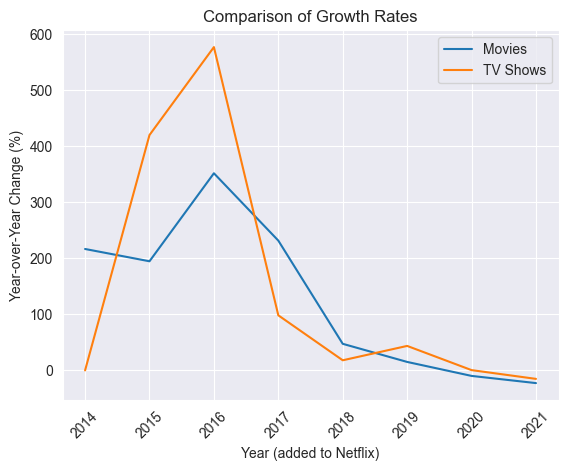

In [295]:
# Visualise growth-rates
plt.plot(counts_only_movies['year_date_added'], counts_only_movies['yoy_change']*100, label='Movies')
plt.plot(counts_only_tv_shows['year_date_added'], counts_only_tv_shows['yoy_change']*100, label='TV Shows')

# Add labels and title
plt.xlabel('year_date_added')
plt.ylabel('Year-over-Year Change (%)')
plt.title('Comparison of Growth Rates')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Year (added to Netflix)')
plt.show()

#### The simple growth rates show that in 2015 and 2016, there was a larger surge in TV Shows. Since then, both types seemed to reach a plateau, even showing negative growth rates. Don’t be misled by the large scale of the plot, however: in 2020, for instance, Movies shrunk by 10%, while about the same number of TV Shows were produced as the year before. To me, these data are not sufficient to declare a trend towards TV Shows. I haven’t spoken about the higher growth rates of Movies in 2017 and 2018, for instance. Maybe other factors such as the target audience (Child vs. Teen/Adult) should be included in the analysis. (see https://medium.com/@jonas_fe/3-insights-about-netflixs-production-behaviour-5747430edf4d)

### Question 2: Are there differences in countries regarding the decision wheter to produce TV Shows or Movies?

In [296]:
# Check distinct countries and their occurences.
df.country.value_counts()

country
United States                             2813
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                200
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

#### It appears that sometimes, multiple countries are listed in the country-column, separated by commas. This could distort insights about the production behaviour of individual countries (for instance, India might produce other Movies/TV Shows when collaborating with the US - something that they would have not produced on their own). Therefore, I will consider only single-entry countries in the analysis for Question 2.

In [297]:
# select only rows with a single country
df_filtered = df[df['country'].astype(str).str.count(',') == 0]

In [298]:
df_filtered.country.isna().sum()

830

#### There are 830 records without a production country. These records will be dropped, because I want to analyse countries. Imputing values would not make sense here.

In [299]:
df_filtered = df_filtered.dropna(subset='country')

In [300]:
df_filtered.shape

(6649, 62)

In [301]:
# group df_filtered by type and country and save as country_df
country_df = df_filtered.groupby(['type', 'country']).size().reset_index(name='count')
country_df.head(10)

,type,country,count
0,Movie,Argentina,38
1,Movie,Australia,39
2,Movie,Austria,5
3,Movie,Bangladesh,3
4,Movie,Belgium,1
5,Movie,Brazil,50
6,Movie,Bulgaria,1
7,Movie,Cambodia,1
8,Movie,Cameroon,1
9,Movie,Canada,122


#### The absolute values are interesting, but I want to look into the Movie/TV Show Ratio for each country. Therefore, I will add a column production_sum which adds the Movies and TV Shows for each country. This can then be used to calculate the fraction of each type and country.

In [302]:
# Add Sum for each country to calculate percentage
country_df['production_sum'] = country_df.groupby(['country'])['count'].transform('sum')
country_df.head()

,type,country,count,production_sum
0,Movie,Argentina,38,56
1,Movie,Australia,39,86
2,Movie,Austria,5,5
3,Movie,Bangladesh,3,3
4,Movie,Belgium,1,9


In [303]:
# calculate Percentage and add column
country_df['percentage'] = country_df['count'] / country_df['production_sum']
country_df

,type,country,count,production_sum,percentage
0,Movie,Argentina,38,56,0.678571
1,Movie,Australia,39,86,0.453488
2,Movie,Austria,5,5,1.000000
3,Movie,Bangladesh,3,3,1.000000
4,Movie,Belgium,1,9,0.111111
...,...,...,...,...,...
113,TV Show,Turkey,29,105,0.276190
114,TV Show,Ukraine,2,2,1.000000
115,TV Show,United Arab Emirates,1,14,0.071429
116,TV Show,United Kingdom,212,418,0.507177


#### I am only interested in countries with at least 50 productions. This filters out the 'smaller' ones. Additionally, I only want to look at the 10 largest for the visualisation.

In [304]:
country_df_top = country_df.loc[country_df['count'] > 50].groupby('type').apply(lambda x: x.nlargest(10, 'percentage'))

In [305]:
country_df_top.head(20)

type         country  count  production_sum  percentage
type                                                                   
Movie   24     Movie       Indonesia     77              79    0.974684
        43     Movie     Philippines     73              75    0.973333
        23     Movie           India    893             972    0.918724
        39     Movie         Nigeria     86              95    0.905263
        14     Movie           Egypt     92             106    0.867925
        59     Movie   United States   2059            2813    0.731959
        56     Movie          Turkey     76             105    0.723810
        9      Movie          Canada    122             181    0.674033
        51     Movie           Spain     97             145    0.668966
        34     Movie          Mexico     70             110    0.636364
TV Show 111  TV Show          Taiwan     68              81    0.839506
        107  TV Show     South Korea    159             200    0.795000
        88   TV Show           Japan    168             244    0.688525
        116  TV Show  United Kingdom    212             418    0.507177
        70   TV Show          Canada     59             181    0.325967
        117  TV Show   United States    754            2813    0.268041
        83   TV Show           India     79             972    0.081276

/var/folders/2b/khy760n51ts4ttpl1yhdkm640000gn/T/ipykernel_15203/4019058167.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_subset['country'], rotation=45)


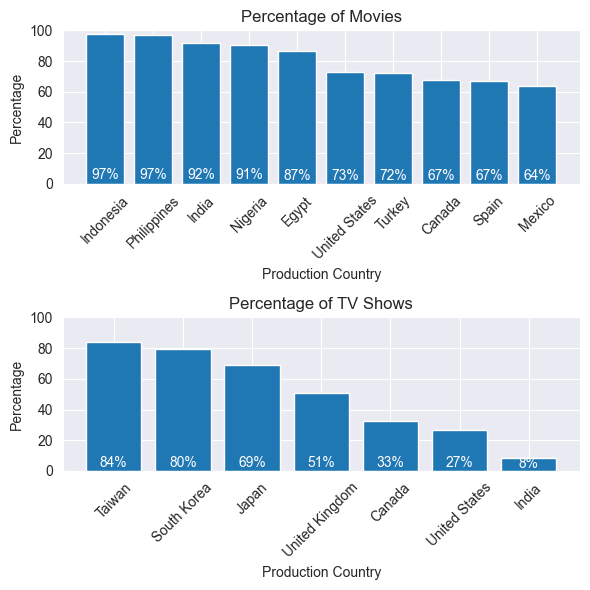

In [306]:
# Visualisation
fig, axs = plt.subplots(2, 1, figsize=(6,6))

for i, t in enumerate(country_df_top['type'].unique()):
    df_subset = country_df_top[country_df_top['type'] == t]
    ax = axs[i]
    ax.bar(df_subset['country'], df_subset['percentage']*100, )
    #ax.plot(df_subset['ID'], df_subset['value2'], label='value2')
    ax.set_title(f"Percentage of {t}s")
    #ax.legend()
    ax.set_xticklabels(df_subset['country'], rotation=45)

    # Show values on the plot
    for x, y1 in zip(df_subset['country'], df_subset['percentage']):
        ax.text(x, round(y1, 2), f'{int(round(y1, 2)*100)}%', ha='center', va='bottom', color='white')
        ax.set_xlabel('Production Country')
        ax.set_ylabel('Percentage')
        #ax.text(x, y2, f'{y2}', ha='center', va='bottom')

for ax in axs.flat:
    #ax.set_xlim(0, 60)  # Set x-axis limits
    ax.set_ylim(0, 100)   # Set y-axis limits

plt.subplots_adjust(wspace=0.4, hspace=10)
plt.tight_layout()
plt.show()

#### Some countries produce almost exclusively Movies (Indonesia, Philippines, India,…), while others focus on TV Shows (Taiwan and South Korea). Apart from cultural preferences (do Bollywood stories work better in Movies?) budget could also play a role.

### Question 3: Is there a trend towards genres?

#### I am only interested in specific countries and genres

In [307]:
interesting_genres = ['Thriller', 'Sci-Fi & Fantasy', 'Drama', 'Anime', 'Action & Adventure', 'Documentaries', 'Comedies', 'Horror', 'Reality TV']
interesting_countries = ['United States', 'India', 'Japan', 'United Kingdom', 'Taiwan', 'South Korea']

In [308]:
# group by country and release_year and calculate the sum (this sums up the one-hot-encoded columns and gives insights into genre productions per year and country
df_genre_sum = df.groupby(['country', 'release_year']).sum()
df_genre_sum.head()

show_id        type  \
country           release_year                          
, France, Algeria 2014               s366       Movie   
, South Korea     2021               s194     TV Show   
Argentina         1985          s304s6706  MovieMovie   
                  1998              s7746       Movie   
                  2004              s1877       Movie   

                                                                   title  \
country           release_year                                             
, France, Algeria 2014                                   Eyes of a Thief   
, South Korea     2021                                              D.P.   
Argentina         1985          Esperando la carrozaEsperando La Carroza   
                  1998                                Pizza, birra, faso   
                  2004                                 Palermo Hollywood   

                                                              director  \
country           release_year                                           
, France, Algeria 2014                                    Najwa Najjar   
, South Korea     2021                                               0   
Argentina         1985                  Alejandro DoriaAlejandro Doria   
                  1998          Israel AdriÃ¡n Caetano, Bruno Stagnaro   
                  2004                                   Eduardo Pinto   

                                                                             cast  \
country           release_year                                                      
, France, Algeria 2014          Khaled Abol El Naga, Souad Massi, Suhail Hadda...   
, South Korea     2021          Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...   
Argentina         1985          Luis Brandoni, China Zorrilla, Antonio Gasalla...   
                  1998          HÃ©ctor Anglada, Jorge SesÃ¡n, Pamela JordÃ¡n,...   
                  2004          Brian Maya, MatÃ­as Desiderio, Manuela Pal, Az...   

                                                 date_added   rating  \
country           release_year                                         
, France, Algeria 2014                        July 30, 2021    TV-14   
, South Korea     2021                      August 27, 2021    TV-MA   
Argentina         1985          August 5, 2021July 15, 2018  TV-MANR   
                  1998                       March 15, 2018    TV-MA   
                  2004                      October 8, 2020    TV-MA   

                                    duration  \
country           release_year                 
, France, Algeria 2014               103 min   
, South Korea     2021              1 Season   
Argentina         1985          95 min95 min   
                  1998                81 min   
                  2004               106 min   

                                                                        listed_in  \
country           release_year                                                      
, France, Algeria 2014           Dramas, Independent Movies, International Movies   
, South Korea     2021                          International TV Shows, TV Dramas   
Argentina         1985          Comedies, Cult Movies, International MoviesCom...   
                  1998                               Dramas, International Movies   
                  2004                               Dramas, International Movies   

                                                                      description  \
country           release_year                                                      
, France, Algeria 2014          After a decade in prison, a Palestinian man wi...   
, South Korea     2021          A young privateâs assignment to capture army...   
Argentina         1985          Cora has three sons and a daughter and sheÂ´s ...   
                  1998          A group of hardscrabble young thieves in Argen...   
                  2004          A pair

#### In this df, all countries (also multiple production countries) are included. Later on, I will only use the countries I am interested in.

In [309]:
# create a nested genre dict that holds information for productions in every country
# iteration over country, genre, and the years 2013-2021
genre_dict = {}
for country in interesting_countries:
    temp_genre_dict = {}
    for genre in interesting_genres:
        temp_dict = {}
        start_year = 2013
        end_year = 2021
        while start_year <= end_year:
            try:
                temp_dict[start_year] = df_genre_sum.loc[(country, start_year)][genre]
                start_year += 1
                #print(temp_dict)
            except KeyError:
                start_year += 1
                continue
        temp_genre_dict[genre] = temp_dict

    genre_dict[country] = temp_genre_dict

In [310]:
genre_dict

{'United States': {'Thriller': {2013: 5,
   2014: 10,
   2015: 18,
   2016: 24,
   2017: 28,
   2018: 30,
   2019: 33,
   2020: 14,
   2021: 5},
  'Sci-Fi & Fantasy': {2013: 3,
   2014: 5,
   2015: 8,
   2016: 5,
   2017: 7,
   2018: 18,
   2019: 12,
   2020: 1,
   2021: 0},
  'Drama': {2013: 21,
   2014: 24,
   2015: 44,
   2016: 78,
   2017: 93,
   2018: 88,
   2019: 110,
   2020: 87,
   2021: 34},
  'Anime': {2013: 0,
   2014: 0,
   2015: 1,
   2016: 0,
   2017: 0,
   2018: 0,
   2019: 2,
   2020: 2,
   2021: 2},
  'Action & Adventure': {2013: 6,
   2014: 2,
   2015: 9,
   2016: 15,
   2017: 21,
   2018: 20,
   2019: 15,
   2020: 20,
   2021: 8},
  'Documentaries': {2013: 16,
   2014: 11,
   2015: 21,
   2016: 63,
   2017: 88,
   2018: 68,
   2019: 51,
   2020: 34,
   2021: 16},
  'Comedies': {2013: 13,
   2014: 25,
   2015: 35,
   2016: 51,
   2017: 72,
   2018: 89,
   2019: 80,
   2020: 98,
   2021: 38},
  'Horror': {2013: 7,
   2014: 7,
   2015: 8,
   2016: 15,
   2017: 22,
   20

#### The genre dict serves as the base for visualisation

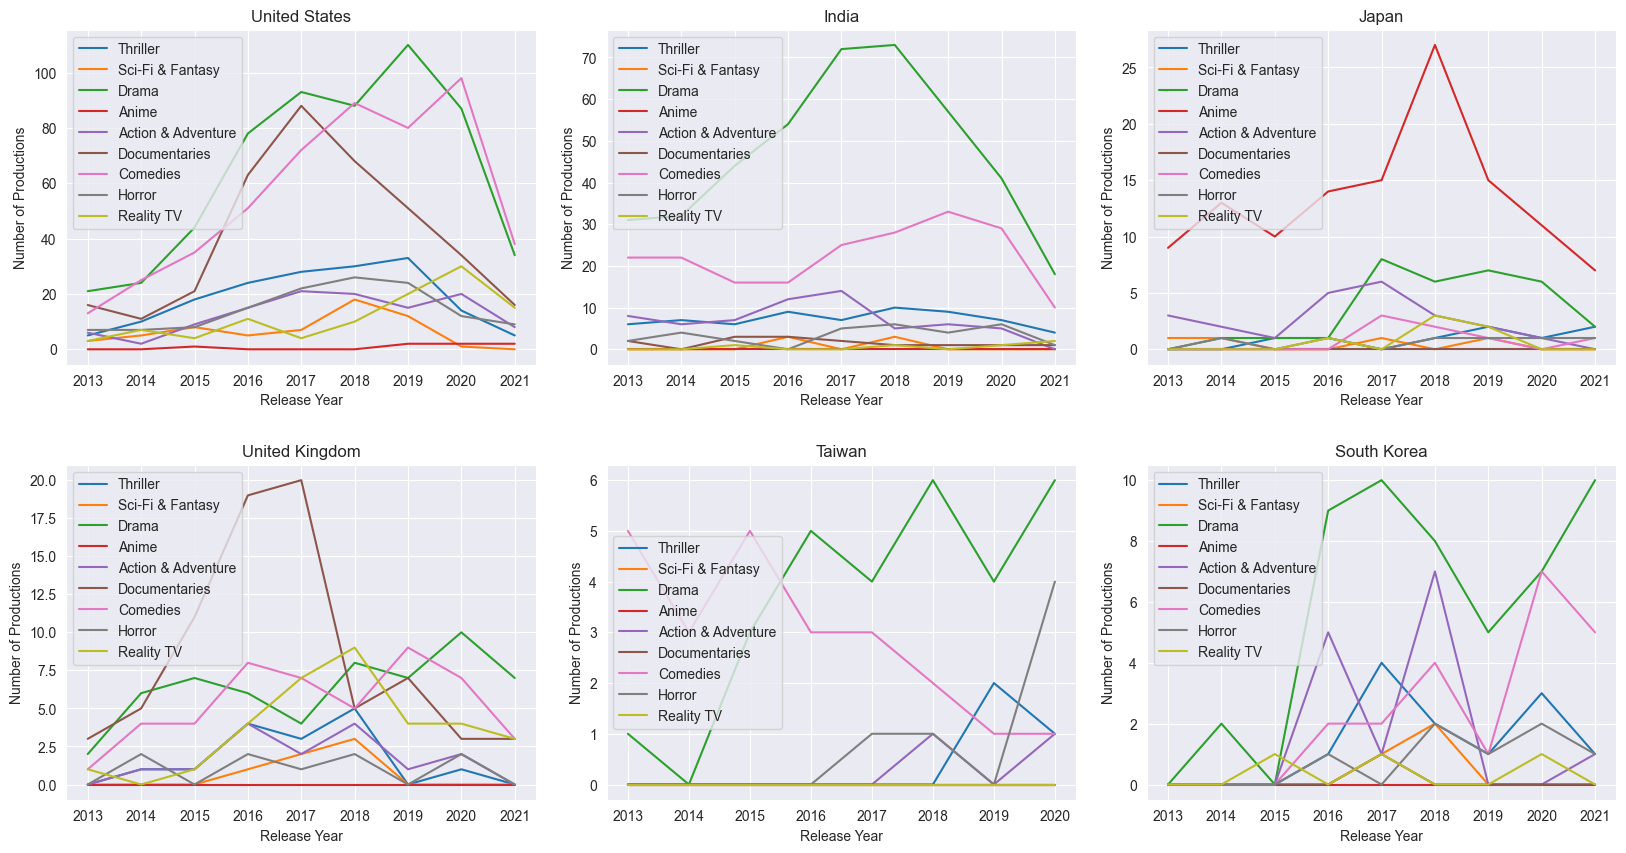

In [311]:
# Visualise
fig, axes = plt.subplots(2, 3, figsize=(20,10))
counter = 0
for row in range(2):
    for col in range(3):
        ax = axes[row, col]

        for genre in interesting_genres:
            sns.lineplot(data=genre_dict[interesting_countries[counter]][genre], x=genre_dict[interesting_countries[counter]][genre].keys(), y=genre_dict[interesting_countries[counter]][genre].values(), label=genre,
                         ax=ax)

        ax.set_title(interesting_countries[counter])
        ax.set_xlabel('Release Year')
        ax.set_ylabel('Number of Productions')
        counter += 1
                #ax.text(country)

plt.subplots_adjust(wspace=0.15, hspace=0.3)


#### The category ‘Drama’ is popular among most investigated countries. Apart from Japan, ‘Comedies’ are also a common choice. Interestingly, the UK seemed to put a lot of capacity into ‘Documentaries’ from 2015 to 2017; a behaviour that has damped ever since. The most striking distinction between countries is Japan’s focus on ‘Anime’, of course (see https://medium.com/@jonas_fe/3-insights-about-netflixs-production-behaviour-5747430edf4d)